<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EXPLORE-DATA" data-toc-modified-id="EXPLORE-DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EXPLORE DATA</a></span></li><li><span><a href="#ENCODE-THE-LABLES-AS-CATEGORICAL-VARIABLES" data-toc-modified-id="ENCODE-THE-LABLES-AS-CATEGORICAL-VARIABLES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ENCODE THE LABLES AS CATEGORICAL VARIABLES</a></span></li><li><span><a href="#COUNT-UNIQUE-LABELS" data-toc-modified-id="COUNT-UNIQUE-LABELS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>COUNT UNIQUE LABELS</a></span></li><li><span><a href="#MEASURE-SUCCESS:-LOGLOSS" data-toc-modified-id="MEASURE-SUCCESS:-LOGLOSS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MEASURE SUCCESS: LOGLOSS</a></span></li><li><span><a href="#2.-SETUP-A-TRAIN-TEST-SPLIT-IN-SKLEARN" data-toc-modified-id="2.-SETUP-A-TRAIN-TEST-SPLIT-IN-SKLEARN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2. SETUP A TRAIN-TEST-SPLIT IN SKLEARN</a></span></li><li><span><a href="#TRAIN-A-MODEL-WITH-LOGIT-REGRESSION" data-toc-modified-id="TRAIN-A-MODEL-WITH-LOGIT-REGRESSION-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TRAIN A MODEL WITH LOGIT REGRESSION</a></span></li><li><span><a href="#USE-MODEL-TO-PREDICT-ON-HOLDOUT-DATA-AND-SUBMIT" data-toc-modified-id="USE-MODEL-TO-PREDICT-ON-HOLDOUT-DATA-AND-SUBMIT-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>USE MODEL TO PREDICT ON HOLDOUT DATA AND SUBMIT</a></span></li><li><span><a href="#BAG_OF_WORD-IN-SKLEARN" data-toc-modified-id="BAG_OF_WORD-IN-SKLEARN-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>BAG_OF_WORD IN SKLEARN</a></span></li><li><span><a href="#COMBINE-TEXT-COLUMNS-FOR-TOKENIZATION" data-toc-modified-id="COMBINE-TEXT-COLUMNS-FOR-TOKENIZATION-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>COMBINE TEXT COLUMNS FOR TOKENIZATION</a></span></li><li><span><a href="#COMBINE-ALL-OF-THEM-INTO-PIPELINE" data-toc-modified-id="COMBINE-ALL-OF-THEM-INTO-PIPELINE-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>COMBINE ALL OF THEM INTO PIPELINE</a></span></li><li><span><a href="#TRY-DIFFERENT-MODEL:-RANDOM-FOREST-AND-ADJUST-PARAMETER" data-toc-modified-id="TRY-DIFFERENT-MODEL:-RANDOM-FOREST-AND-ADJUST-PARAMETER-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>TRY DIFFERENT MODEL: RANDOM FOREST AND ADJUST PARAMETER</a></span></li><li><span><a href="#4" data-toc-modified-id="4-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>4</a></span></li><li><span><a href="#INTERACTION-MODELLING" data-toc-modified-id="INTERACTION-MODELLING-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>INTERACTION MODELLING</a></span></li><li><span><a href="#HASHING" data-toc-modified-id="HASHING-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>HASHING</a></span></li><li><span><a href="#PIPELINE-COMBINE-HASHING-+-INTERACTION" data-toc-modified-id="PIPELINE-COMBINE-HASHING-+-INTERACTION-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>PIPELINE COMBINE HASHING + INTERACTION</a></span></li></ul></div>

In [2]:
import pandas as pd
df = pd.read_csv('TrainingData.csv', index_col = 0)

## EXPLORE DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [4]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [5]:
df.tail()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
109283,Professional Development,ISPD,Shared Services,Non-School,Unspecified,Instructional Coach,Other Compensation/Stipend,NO_LABEL,PreK-12 Operating,WORKSHOP PARTICIPANT,...,NaN,STAFF DEV AND INSTR MEDIA,NaN,INST STAFF TRAINING SVCS,NaN,NaN,48.620000,NaN,GENERAL FUND,STAFF DEV AND INSTR MEDIA
102430,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF PART TIME EMPLOYEE,...,NaN,NaN,0.00431,"TITLE II,D",NaN,PROFESSIONAL-INSTRUCTIONAL,128.824985,INSTRUCTIONAL STAFF TRAINING,NaN,INSTRUCTIONAL STAFF
413949,Parent & Community Relations,NO_LABEL,School Reported,School,NO_LABEL,Other,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.00000,NaN,NaN,PARENT/TITLE I,4902.290000,Misc,Schoolwide Schools,NaN
433672,Library & Media,Instruction,School on Central Budgets,Non-School,Unspecified,Librarian,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,ED RESOURCE SERVICES,NaN,NON-PROJECT,NaN,OFFICE/ADMINISTRATIVE SUPPORT,4020.290000,MEDIA SUPPORT SERVICES,NaN,INSTRUCTIONAL STAFF
415831,Substitute Compensation,Instruction,School Reported,School,Poverty,Substitute,Substitute Compensation,Non PreK,PreK-12 Operating,Salaries And Wages For Substitute Professionals,...,Inservice Substitute Teachers Grant Funded,School,NaN,Instruction,Instruction And Curriculum,CERTIFIED SUBSTITUTE,46.530000,Accelerated Education,"""Title Part A Improving Basic Programs""",MISCELLANEOUS


In [6]:
# Print the summary statistics
print(df.describe())

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


=> there are 2 numeric columns

The high variance in expenditures ('Total') makes sense (some purchases are cheap some are expensive).

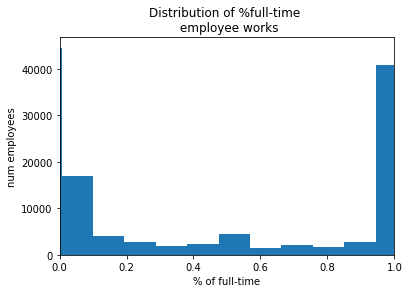

In [8]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna(), bins = 500)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.xlim([0,1])

# Display the histogram
plt.show()

=> it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

## ENCODE THE LABLES AS CATEGORICAL VARIABLES

In [9]:
# Data types
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

=> 23 'object' type => inefficient

In [10]:
# There are 9 labels in datasets which are
# https://www.drivendata.org/competitions/4/box-plots-for-education/page/15/#labels_list
LABELS = ['Function',
 'Object_Type',
 'Operating_Status',
 'Position_Type',
 'Pre_K',
 'Reporting',
 'Sharing',
 'Student_Type',
 'Use']

In [11]:
# Check out the type for the labels
df[LABELS].dtypes

Function            object
Object_Type         object
Operating_Status    object
Position_Type       object
Pre_K               object
Reporting           object
Sharing             object
Student_Type        object
Use                 object
dtype: object

=> should change to 'category' for efficient

In [12]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

.astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the .apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.

In [13]:
# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Object_Type         category
Operating_Status    category
Position_Type       category
Pre_K               category
Reporting           category
Sharing             category
Student_Type        category
Use                 category
dtype: object


## COUNT UNIQUE LABELS

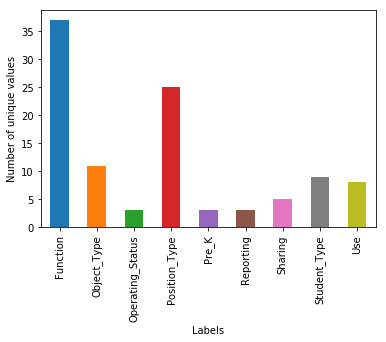

In [14]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

## MEASURE SUCCESS: LOGLOSS

- Predictions will be probabilities for each label
- log loss provides a steep penalty for predictions that are both wrong and confident
- Better to be less confident than confident and wrong

In [15]:
# Define logloss
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
        actual when these are 1D arrays.
    
        :param predicted: The predicted probabilities as floats between 0-1
        :param actual: The actual binary labels. Either 0 or 1.
        :param eps (optional): log(0) is inf, so we need to offset our
                predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
              + (1 - actual)
              * np.log(1 - predicted))
    return loss

In [16]:
# Define types of prediction
actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  0.65,  0.65,  0.65,  0.65,  0.65])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.95,  0.95,  0.95,  0.95,  0.95])

In [18]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 1.5114254167193697
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


## 2. SETUP A TRAIN-TEST-SPLIT IN SKLEARN

- Default train-test split not work because it not work with many target variable. Moreover, we could end up with labels in test set that never appear in training set 
- New function make sure at least min-count examples of each label appear in each split

In [19]:
# Define function train-test-split for multiple labels
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.

        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    # get 'min_count' sample from each column, concat the indice and then get the unique indices
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])


In [20]:
# Create the new DataFrame: numeric_data_only
NUMERIC_COLUMNS = ['FTE', 'Total']
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

In [21]:
# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

In [22]:
# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

In [23]:
# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 8.6 MB
None


## TRAIN A MODEL WITH LOGIT REGRESSION

In [24]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # Treats each column of y independently and fits a separate classifier for each of the columns

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Accuracy: 0.0


In [25]:
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


## USE MODEL TO PREDICT ON HOLDOUT DATA AND SUBMIT

- Holdout data: additional test set with hidden correct labels, only seen by holder of competition
- Correct format: https://www.drivendata.org/competitions/4/page/15/#sub_values

In [26]:
# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS],
                                                    prefix_sep='__').columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# Score: 2.715

## BAG_OF_WORD IN SKLEARN

In [28]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
# [A-Za-z0-9]: alphanumeric character
# +: one or moer
# (?=\\s+): followed by (?=) one or more space
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


## COMBINE TEXT COLUMNS FOR TOKENIZATION

- In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.
- In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. 

In [29]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern: using any non-whitespace characters as a token 
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


## COMBINE ALL OF THEM INTO PIPELINE

In [ ]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
# FuntionTransformer creates an object with 'fit' and 'transform' method to used with pipeline
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Complete the pipeline: pl
# only two high-level steps in your pipeline: preprocessing ('union') and model instantiation ('clf').
numeric_pipeline = Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer()) # By default, the imputer transformer replaces NaNs with the mean value of the column.
                ])

text_pipeline = Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ])
    
pl = Pipeline([
        ('union', FeatureUnion( # FeatureUnion use allavailable features in 1 pipeline because pipeline steps for numeric and text can't follow each other, they must be at the same time
            transformer_list = [
                ('numeric_features', numeric_pipeline),
                ('text_features', text_pipeline)
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Predict on holdout data
predictions = pl.predict_proba(holdout)

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS],
                                                    prefix_sep='__').columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

## TRY DIFFERENT MODEL: RANDOM FOREST AND ADJUST PARAMETER

In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

## 4

In [ ]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))), # Include unigrams and bi-grams in the model to capture important information involving multiple tokens - e.g., ‘middle school
                    ('dim_red', SelectKBest(chi2, chi_k)) # Dimensional reduction use chi-sqaured test to select K best feature 
                ])) # http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
             ]
        )),
        ('scale', MaxAbsScaler()), # Scale the features
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])
                
# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Predict on holdout data
predictions = pl.predict_proba(holdout)

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS],
                                                    prefix_sep='__').columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

## INTERACTION MODELLING

- Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.
- Eg: (English teacher for 2nd grade) and (2nd grade - budget for English teacher)


In [ ]:
# Interaction with Polynomial features
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(6).reshape(3, 2)
x
interaction = PolynomialFeatures(degree = 2,
                                 interaction_only=True,
                                 include_bias=False)
interaction.fit_transform(x)

# Bias term allows model to have non-zero y value when x value is 0

# Sparse interaction features: replacement for PolynomialFeatures since:
    # The number of interaction terms grows exponentially => vectorizer saves memory by using sparse matrix -  a matrix that is comprised of mostly zero values
    # PolynomialFeatures does not support sparse matrices => use SparseInteractions instead

# Define SparseInteractions (dont need to understand)
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)    

# SparseInteractions works like PolynomialFeatures
SparseInteractions(degree=2).fit_transform(x).toarray()

## HASHING

In [ ]:
# Hash function limits possible outputs, fixing array size (like a dictionary).
hash_dict = {'and': 780, 'fluids': 354, 'fuel': 895, 'petro': 354, 'vend': 785}
# => some text is hashed to the same value to make sure the number of featured is fixed => reduce number of features compared with CountVectorizer
# Cons: there can be collisions: distinct tokens can be mapped to the same feature index.
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

# Compare with CountVectorizer
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
vec_text = vec_alphanumeric.fit_transform(text_vector)
vec_df = pd.DataFrame(vec_text.data)
print(vec_df.head())

## PIPELINE COMBINE HASHING + INTERACTION

In [ ]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])
                    

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Predict on holdout data
predictions = pl.predict_proba(holdout)

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS],
                                                    prefix_sep='__').columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')